# IDS Project

#                                       Predicting Quality of Wine

### Importing Libraries

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

### Reading data

In [2]:
#Reading the data from winequality-red.csv
df=pd.read_csv("winequality-red.csv")

In [3]:
#First 5 entries
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Understanding and Preparing the data

In [4]:
#Dimension of Dataframe
df.shape

(1599, 12)

In [5]:
#information regarding all the attributes present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#number of duplicate datapoints present
df.duplicated().sum()

240

In [7]:
#Dropping Duplicate datapoints
df.drop_duplicates(inplace = True)

In [8]:
#number of duplicate datapoints present
df.duplicated().sum()

0

In [9]:
#Dimension of Dataframe
df.shape

(1359, 12)

In [10]:
#No. of unique values in each attribute
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [11]:
#statastical description of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


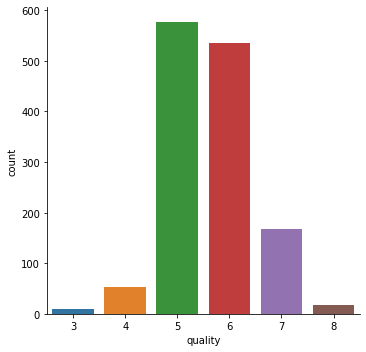

In [12]:
#graph to see quality distribution in our dataset.
sns.catplot(x='quality',data=df,kind='count');

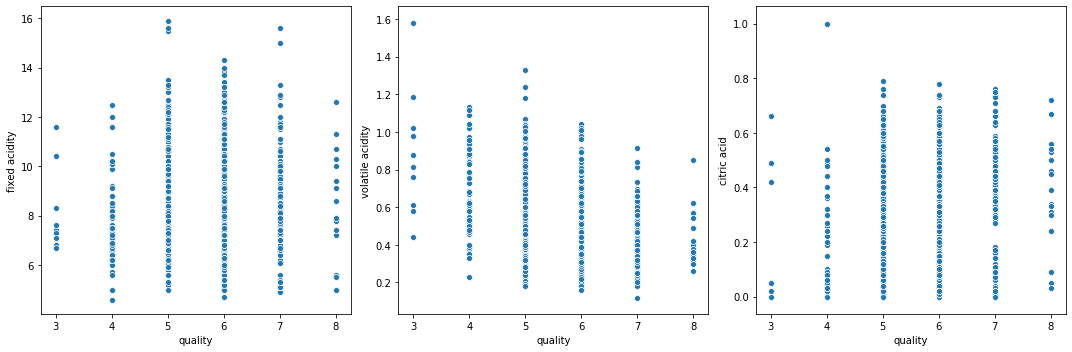

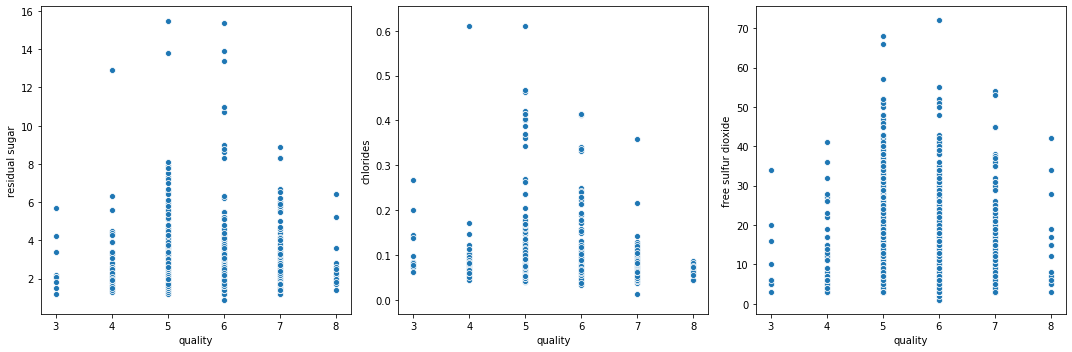

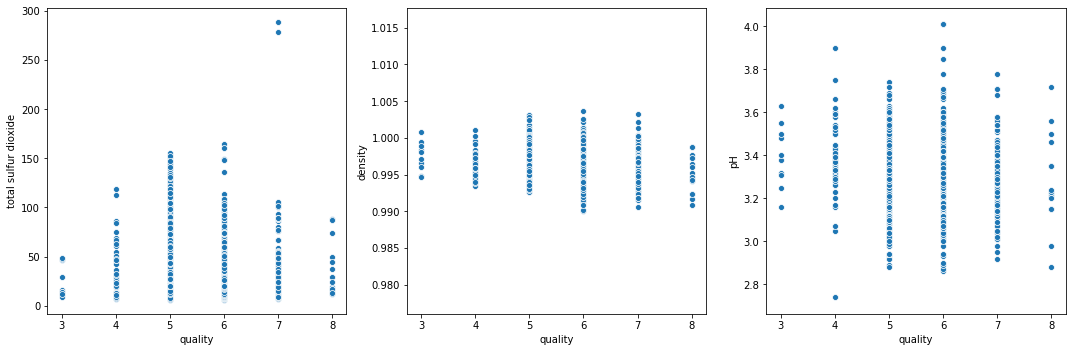

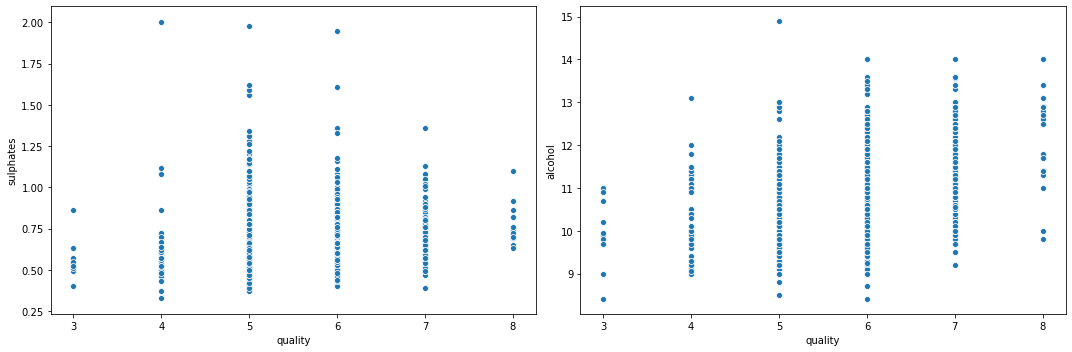

In [13]:
fig, ax = plt.subplots(1, 3,figsize=(15,5))
sns.scatterplot('quality', 'fixed acidity', data = df,ax=ax[0])
sns.scatterplot('quality', 'volatile acidity', data = df,ax=ax[1])
sns.scatterplot('quality', 'citric acid', data = df,ax=ax[2])
plt.tight_layout()


fig, ax = plt.subplots(1, 3,figsize=(15,5))
sns.scatterplot('quality', 'residual sugar', data = df,ax=ax[0])
sns.scatterplot('quality', 'chlorides', data = df,ax=ax[1])
sns.scatterplot('quality','free sulfur dioxide', data = df,ax=ax[2])
plt.tight_layout()

fig, ax = plt.subplots(1, 3,figsize=(15,5))
sns.scatterplot('quality', 'total sulfur dioxide', data = df,ax=ax[0])
sns.scatterplot('quality', 'density', data = df,ax=ax[1])
sns.scatterplot('quality', 'pH', data = df,ax=ax[2])
plt.tight_layout()

fig, ax = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot('quality', 'sulphates', data = df,ax=ax[0])
sns.scatterplot('quality','alcohol' , data = df,ax=ax[1])
plt.tight_layout()


### Detecting and Handling Outliers

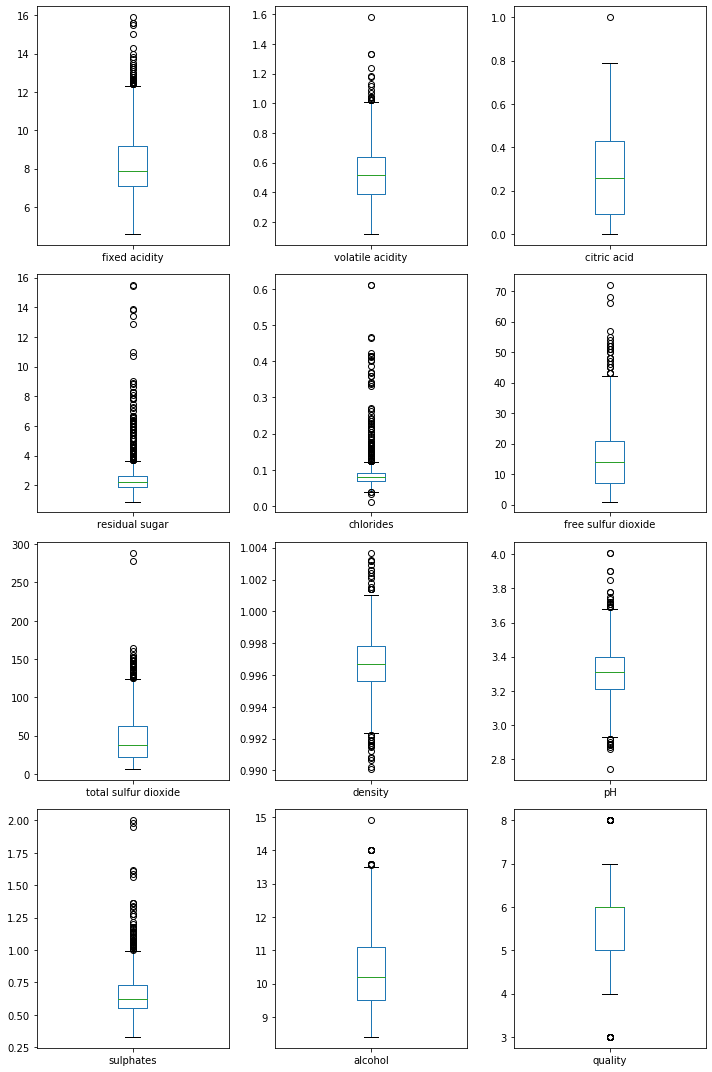

In [14]:
#boxplot to see outliers
plt.figure(figsize=(10,15))
for i,col in enumerate(list((df.columns).values)):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [15]:
#statistical description of the data
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
90%,10.700000,0.760000,0.530000,3.460000,0.110000,31.000000,94.000000,0.999100,3.510000,0.850000,12.000000,7.000000
95%,11.710000,0.850500,0.600000,4.800000,0.137600,35.000000,113.000000,0.999800,3.570000,0.940000,12.500000,7.000000
99%,13.242000,1.029200,0.704200,8.300000,0.368420,50.000000,145.840000,1.001400,3.704200,1.280000,13.400000,8.000000


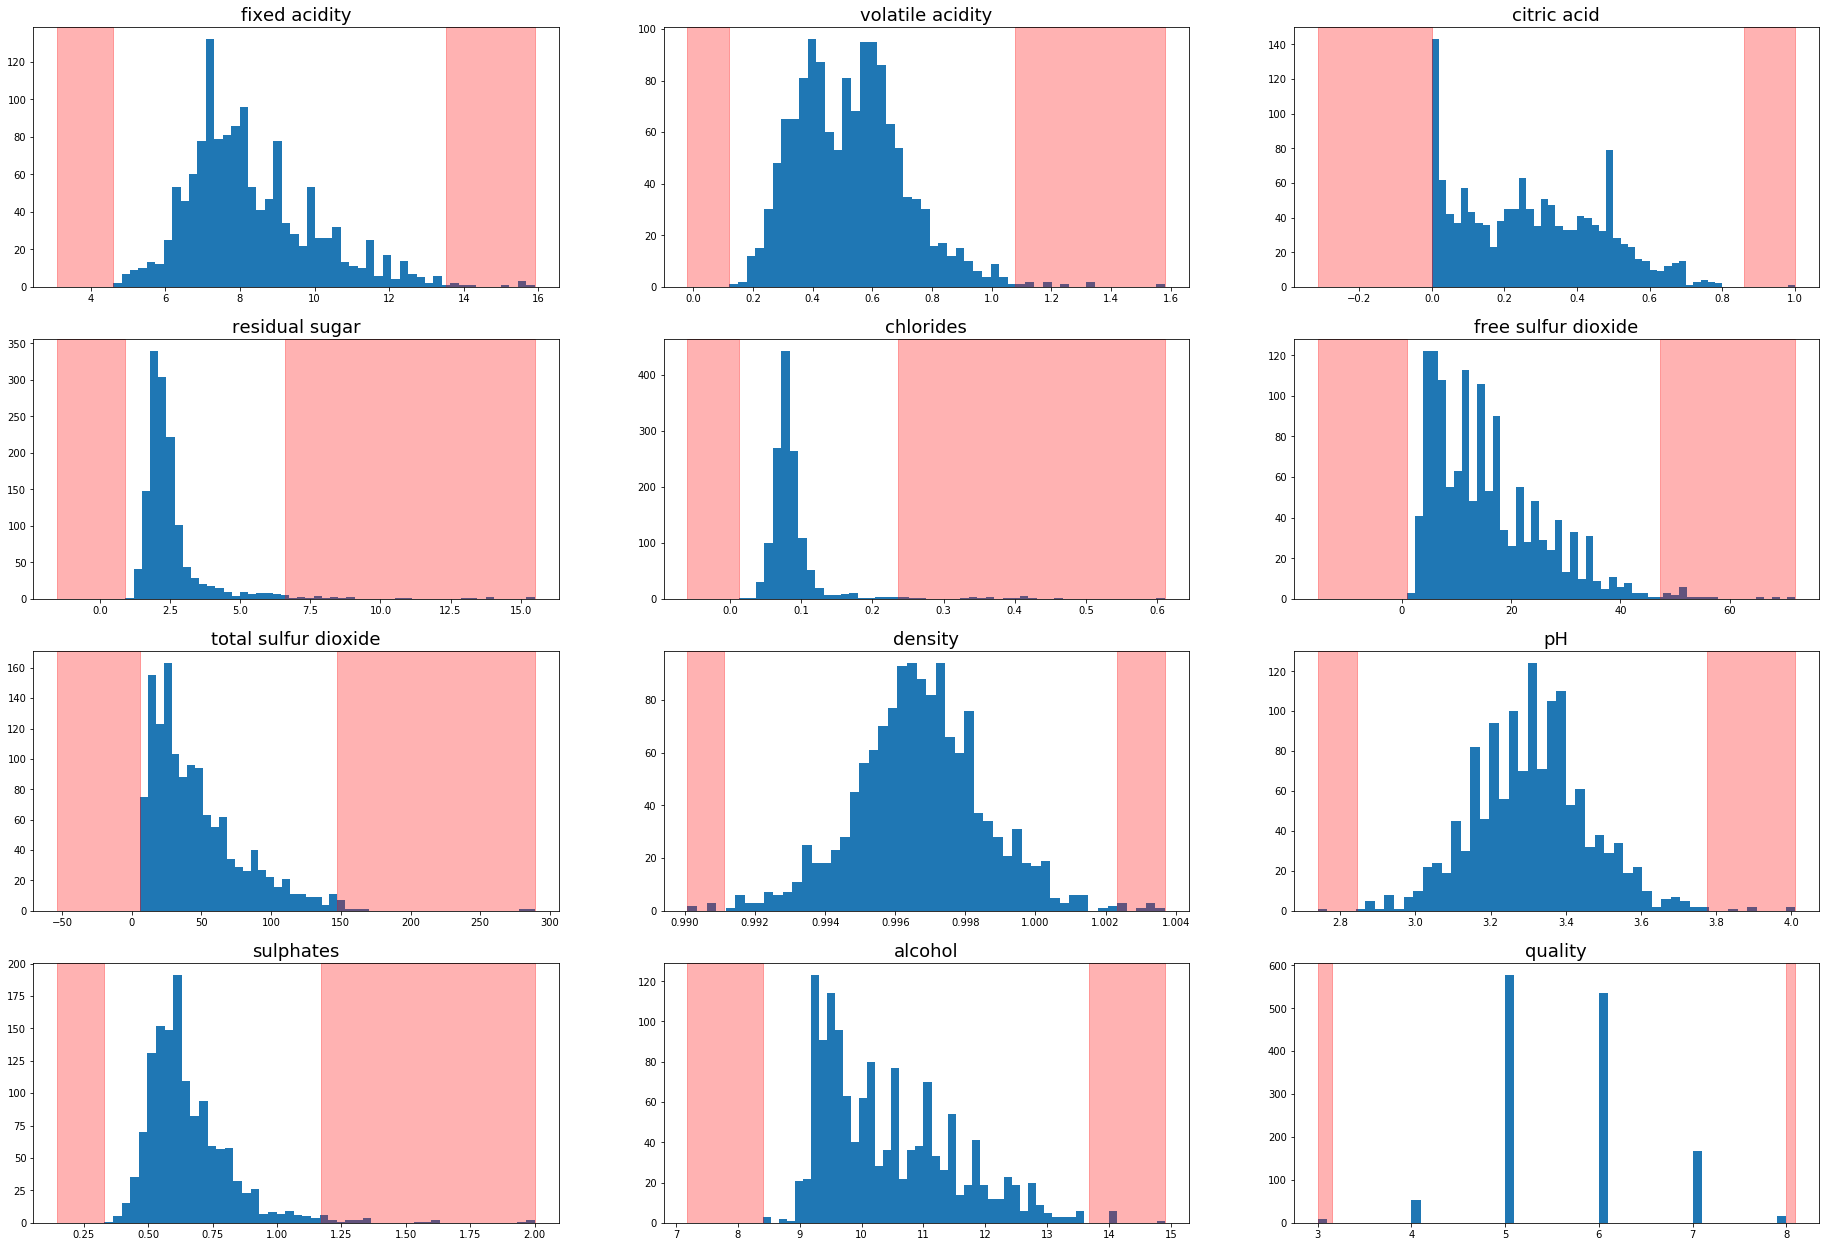

In [16]:
#Histogram
plt.figure(figsize=(32,22))
for i in range(1,df.shape[1]+1):
    feature = df.iloc[:,i-1]
    mean = feature.mean()
    std_3 = feature.std()*3
    lower, upper = mean-std_3,mean+std_3
    plt.subplot(4,3,i)
    plt.hist(df.iloc[:,i-1],bins=50)
    plt.title(df.columns[i-1],fontsize=18)
    plt.axvspan(feature.min(),lower,color='red',alpha=0.3)
    plt.axvspan(upper,feature.max(),color='red',alpha=0.3)


##### Eliminating outliers

In [17]:
#Removing outliers
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape
 

(1232, 12)

### Checking the correlation between attributes

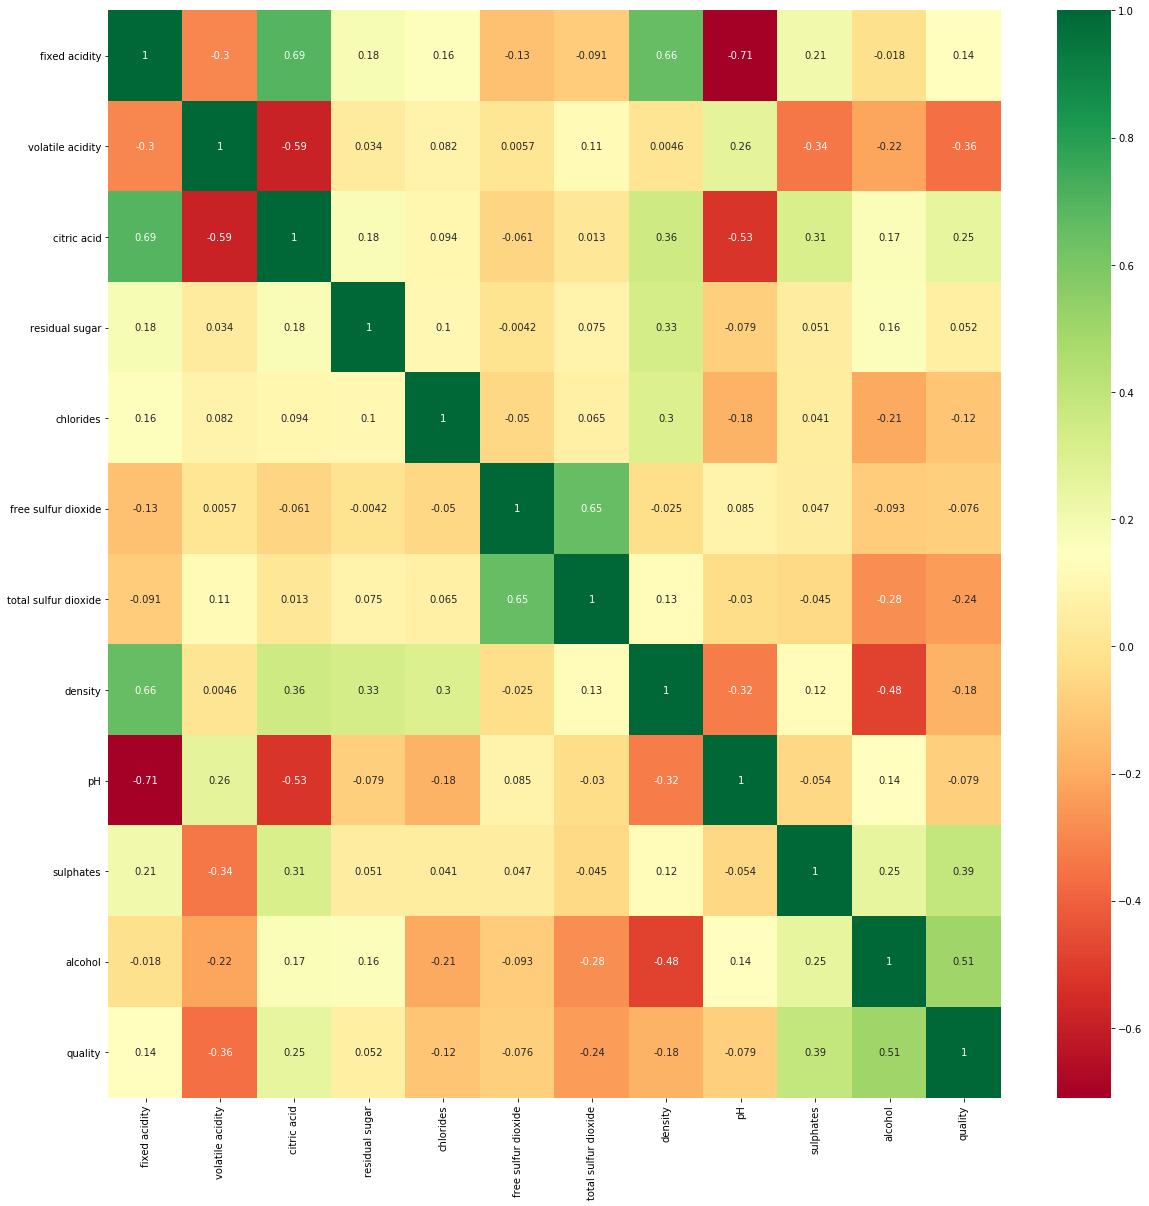

In [18]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Converting the attribute 'quality' into binary attribute


In [19]:
# Converting the 'quality' attribute into binary attribute for classifcation as Good/Bad:1/0.
df["quality"]=df["quality"].apply(lambda x: 1 if x>5.6 else 0)
df['quality'].value_counts()

1    660
0    572
Name: quality, dtype: int64

In [20]:
#First 5 entries
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


### Standardising the Variables

Standardising the attributes and separating my feature variables (df_feat) and the target variable (df_label) into separate dataframes.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('quality',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_features = scaler.transform(df.drop('quality',axis=1))

In [25]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.547988,1.023020,-1.396433,-0.579225,-0.254285,-0.448588,-0.344675,0.657710,1.395796,-0.632868,-0.988179
1,-0.305335,2.070146,-1.396433,0.270883,0.726802,1.051751,0.753876,0.074031,-0.804660,0.291122,-0.602843
2,-0.305335,1.372062,-1.186653,-0.093449,0.459233,-0.019920,0.321113,0.190766,-0.378765,0.060124,-0.602843
3,1.757216,-1.420272,1.540487,-0.579225,-0.298880,0.194414,0.520850,0.774446,-1.088589,-0.478870,-0.602843
4,-0.547988,0.790326,-1.396433,-0.700669,-0.298880,-0.234254,-0.144939,0.657710,1.395796,-0.632868,-0.988179


In [26]:
df_label=df['quality']

### Pair Plot

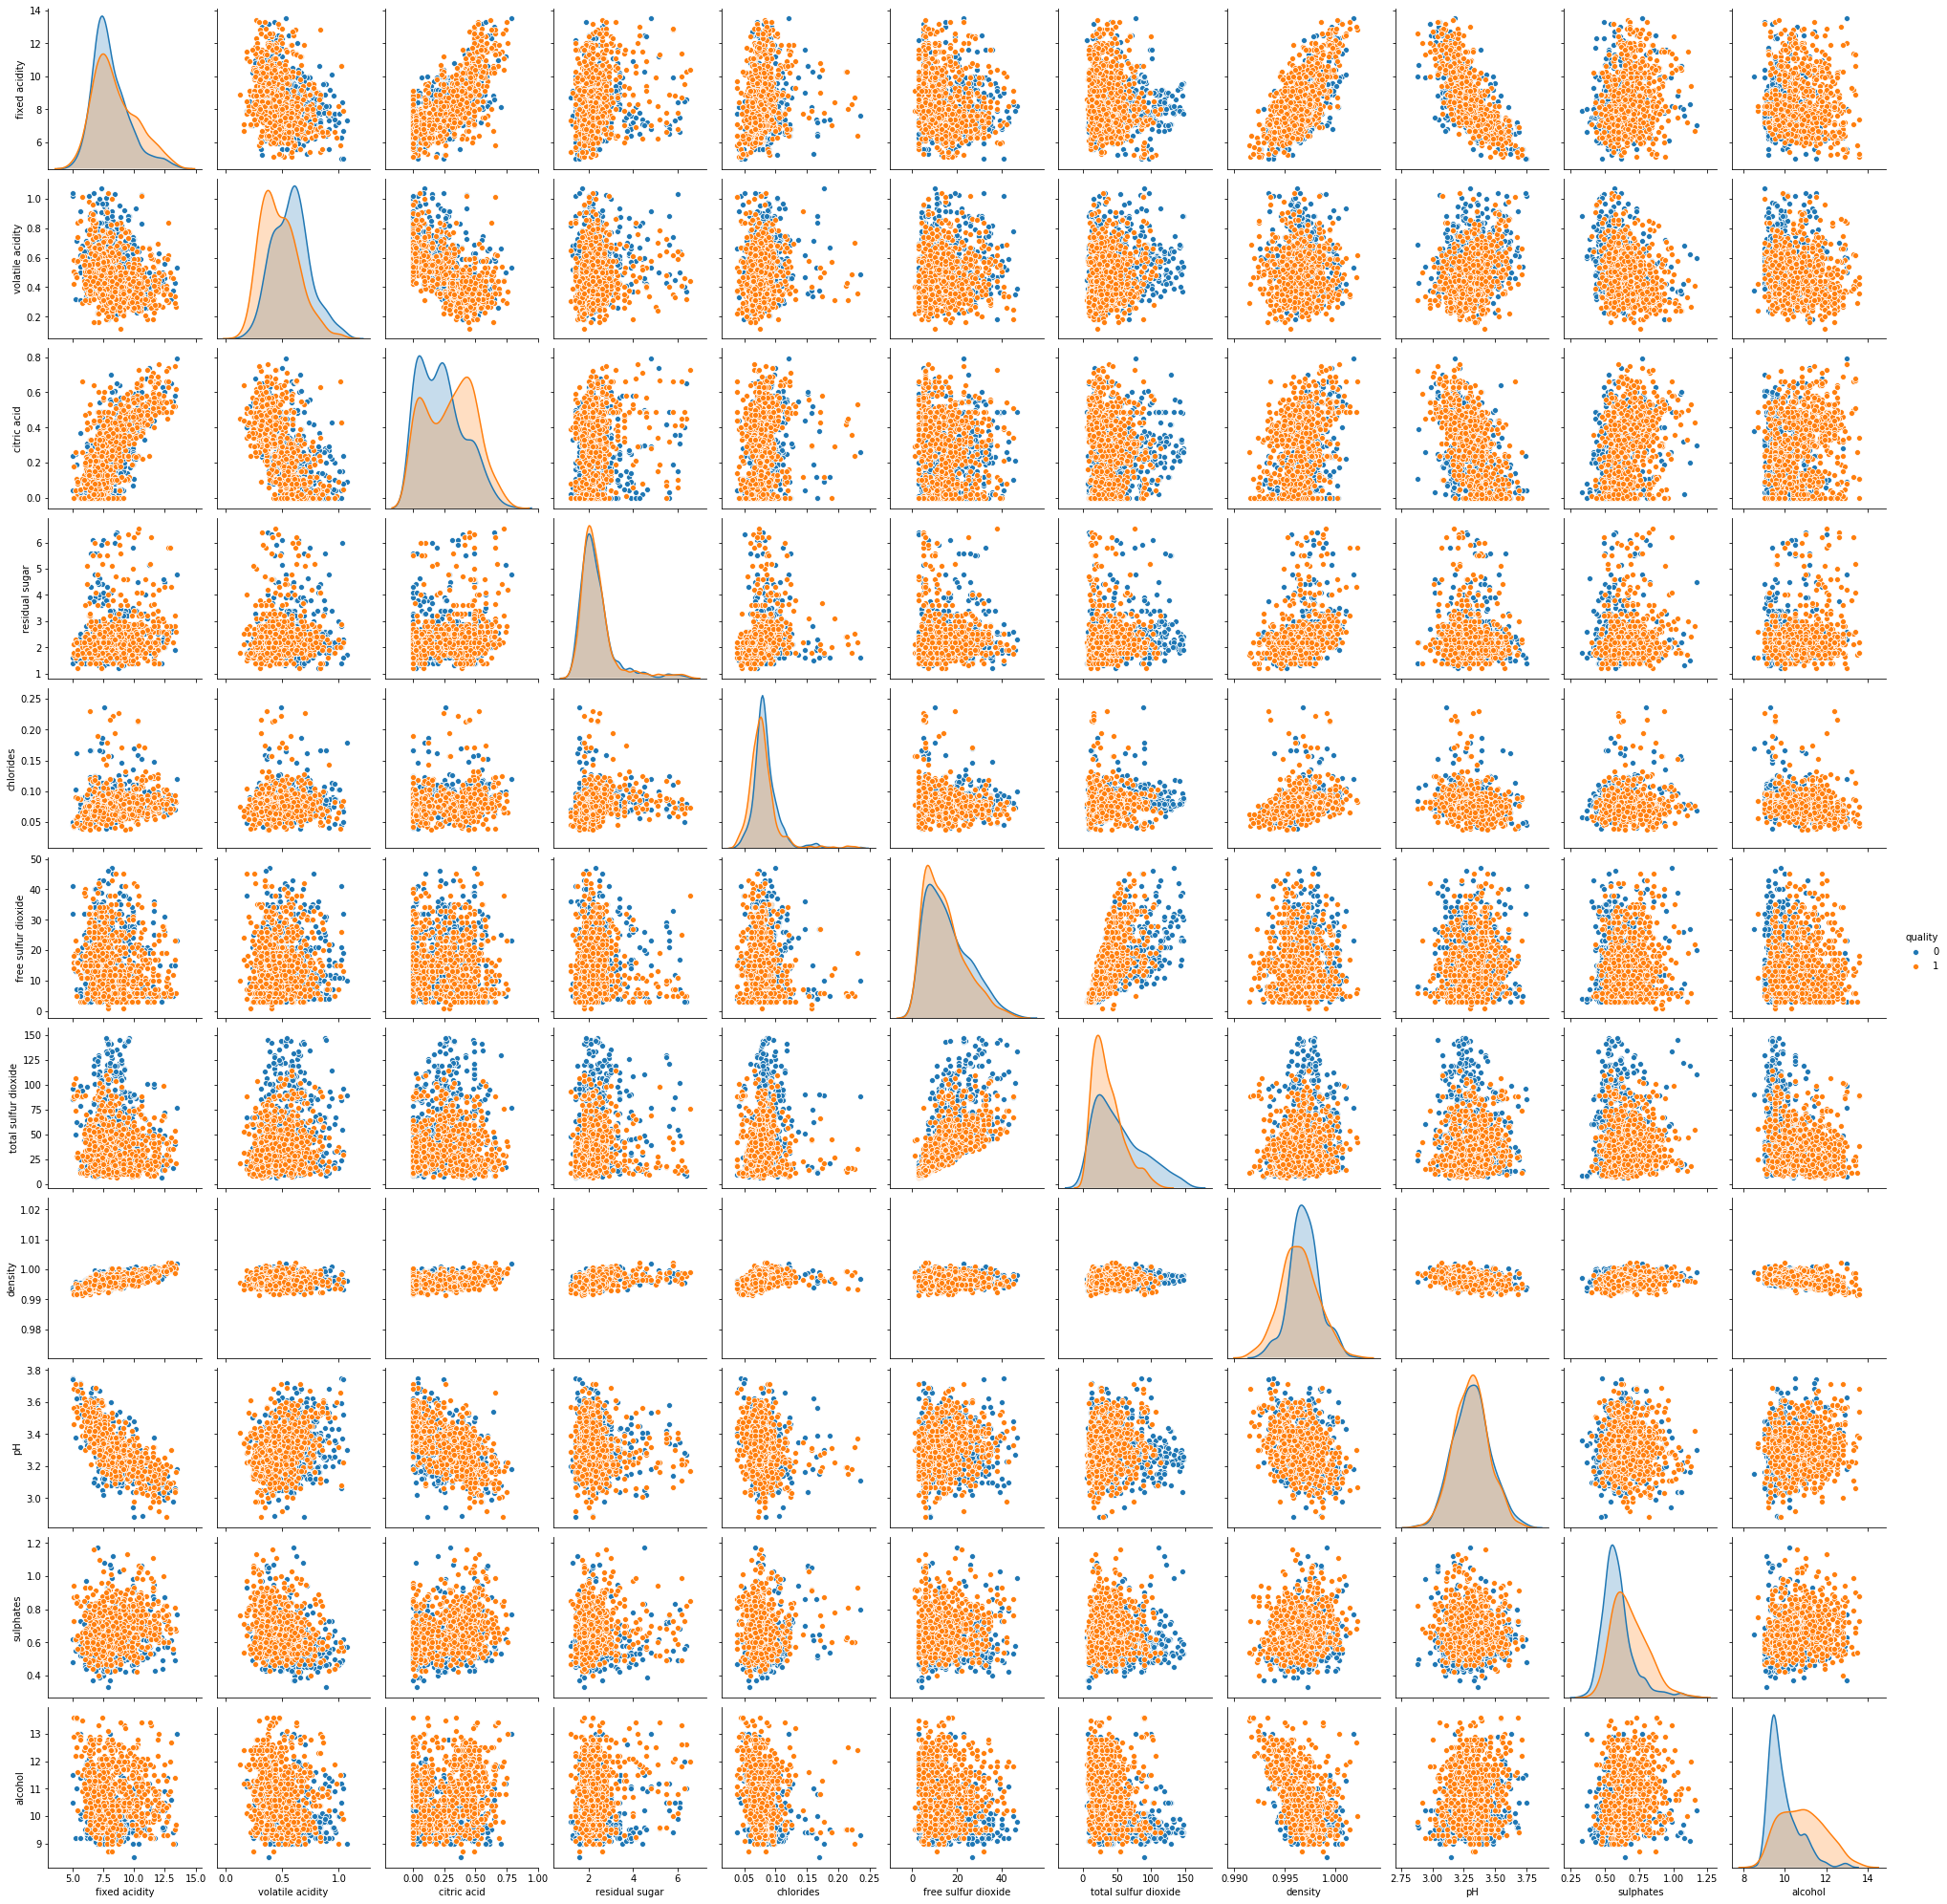

In [27]:
import seaborn as sns

sns.pairplot(df,hue='quality');

#### Since there are overlapping patterns present, linear classifiers like Support Vector Machines and Logistic Regression will not be able to perform the classification task properly.Insted of them,we will apply other classification model

### Splitting the data 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_label,
                                                    test_size=0.25)

## Applying ML Models

### Decision Tree

In [30]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       128
           1       0.74      0.70      0.72       180

    accuracy                           0.68       308
   macro avg       0.67      0.67      0.67       308
weighted avg       0.68      0.68      0.68       308



### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74       128
           1       0.83      0.77      0.80       180

    accuracy                           0.77       308
   macro avg       0.76      0.77      0.77       308
weighted avg       0.77      0.77      0.77       308



### AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       128
           1       0.79      0.73      0.76       180

    accuracy                           0.73       308
   macro avg       0.72      0.73      0.73       308
weighted avg       0.74      0.73      0.73       308



### Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       128
           1       0.81      0.74      0.77       180

    accuracy                           0.75       308
   macro avg       0.74      0.75      0.74       308
weighted avg       0.75      0.75      0.75       308



### XGBoost

In [34]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       128
           1       0.79      0.78      0.78       180

    accuracy                           0.75       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.75      0.75      0.75       308



##### By comparing the above five models, the random forest seems to yield the highest level of accuracy.
##### Therefore, We can conclude that the random forest is the best model for our dataset 

### Feature Importance

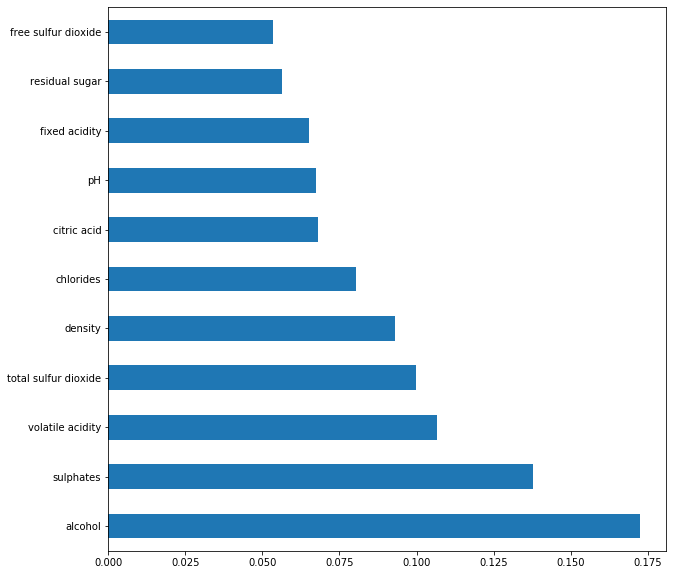

In [35]:
feat_importances = pd.Series(model2.feature_importances_, index=df_feat.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [36]:
# Filtering df for only good quality
df_temp = df[df['quality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.0
mean,8.480303,0.475500,0.298470,2.388030,0.079556,14.531818,36.671212,0.996425,3.310273,0.682561,10.863662,1.0
std,1.759123,0.163015,0.195993,0.838468,0.023818,8.978167,21.909929,0.001852,0.137040,0.127422,1.065158,0.0
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.400000,8.700000,1.0
25%,7.200000,0.350000,0.117500,1.900000,0.066000,7.000000,20.000000,0.995197,3.220000,0.590000,10.000000,1.0
50%,8.100000,0.450000,0.310000,2.200000,0.077000,13.000000,31.000000,0.996385,3.310000,0.660000,10.800000,1.0
75%,9.700000,0.580000,0.460000,2.600000,0.086000,19.000000,48.000000,0.997600,3.400000,0.760000,11.700000,1.0
max,13.400000,1.040000,0.760000,6.550000,0.230000,45.000000,114.000000,1.002200,3.710000,1.160000,13.600000,1.0


In [37]:
# Filtering df for only bad quality
df_temp2 = df[df['quality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.0
mean,8.099126,0.580271,0.229108,2.364161,0.084178,15.940559,53.218531,0.996959,3.316923,0.595612,9.920542,0.0
std,1.487831,0.164912,0.177567,0.806997,0.020463,9.683609,35.298866,0.001490,0.145343,0.116602,0.733626,0.0
min,5.000000,0.180000,0.000000,1.200000,0.039000,3.000000,6.000000,0.992560,2.880000,0.330000,8.500000,0.0
25%,7.100000,0.460000,0.080000,1.900000,0.073000,8.000000,23.000000,0.996047,3.220000,0.520000,9.400000,0.0
50%,7.800000,0.580000,0.220000,2.200000,0.081000,14.000000,45.000000,0.996900,3.310000,0.580000,9.700000,0.0
75%,8.900000,0.680000,0.340000,2.600000,0.091000,22.250000,75.000000,0.997830,3.400000,0.640000,10.225000,0.0
max,13.500000,1.070000,0.790000,6.400000,0.236000,47.000000,147.000000,1.001800,3.750000,1.170000,13.000000,0.0
